In [65]:
# Importar dependencias
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Leer el archivo csv
df = pd.read_csv('BaseDefinitivaINDICES-2005-2024_clean.csv')

In [80]:
# Mostrar las columnas
print(df.columns)
# transform every column that can be transformed to numeric
df['matricula_total_hombres'] = pd.to_numeric(df['matricula_total_hombres'])
df['matricula_total_mujeres'] = pd.to_numeric(df['matricula_total_mujeres'])
df['matricula_total_nacional'] = pd.to_numeric(df['matricula_total_nacional'])
df['anio'] = pd.to_numeric(df['anio'])


Index(['anio', 'cod_institucion', 'nombre_institucion', 'tipo_institucion',
       'clasificacion1', 'clasificacion2', 'clasificacion3', 'clasificacion4',
       'clasificacion5', 'clasificacion6', 'nombre_de_la_sede',
       'comuna_donde_se_imparte_la_carrera_o_programa', 'nombre_region',
       'orden_geografico_de_la_region_norte_asur', 'cod_carrera',
       'carrera_generica', 'nombre_programa', 'horario', 'tipo_programa',
       'area_conocimiento', 'idgenerocarrera', 'tipo_carrera',
       'ingresodirecto', 'anio_inicio_actividades', 'duracion_en_semestres',
       'cod_sede', 'tipo_moneda', 'vacantes', 'matricula_primer_anio_hombres',
       'matricula_primer_anio_mujeres', 'matricula_primer_anio_extranjeros',
       'auxiliar', 'matricula_primer_anio', 'matricula_total_hombres',
       'matricula_total_mujeres', 'matricula_total_extranjeros',
       'matricula_total', 'pregradoposgrado', 'matricula_total_nacional',
       'percent_matricula_total_hombres', 'percent_matricula_t

# Gráfico de barras de las 5 carreras con más matriculados hombres
A continuación se encuentra el gráfico de barras de las 5 carreras con más matriculados hombres.
En el gráfico se visualiza que la carrera con más matriculados hombres es la de Posgrado (generalizado), seguido de la carrara de Ingeniería Comercial,
Derecho, Ingeniería en Computación e Ingeniería Civil Industrial.

Cabe destacar que la "posgrado" sí está desglosado en el campo "Área del conocimiento".

Se utilizó un gráfico de barras porque permite visualizar de buena forma las cantidades de cada grupo.

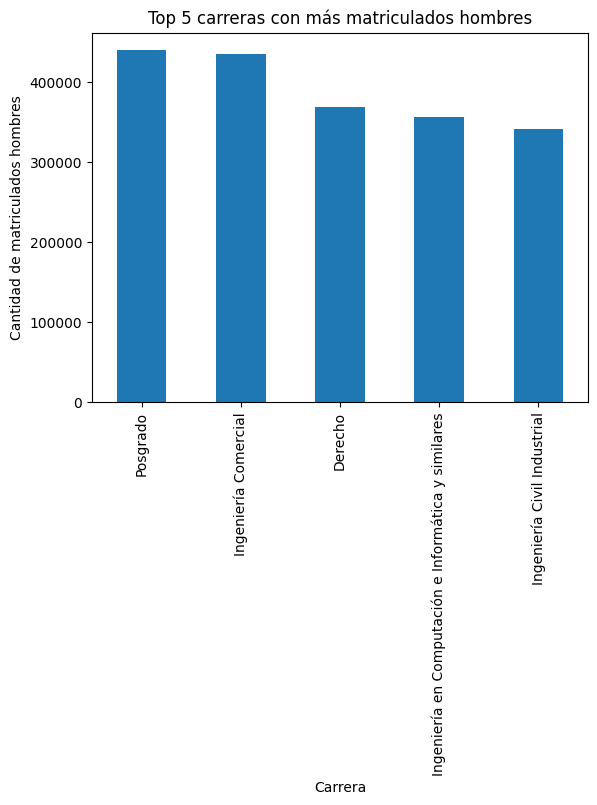

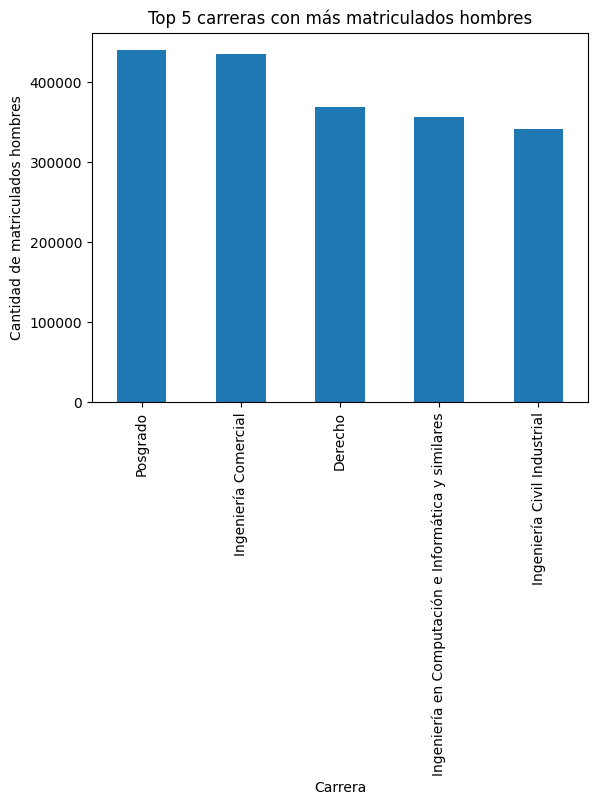

In [109]:
df.groupby('carrera_generica')['matricula_total_hombres'].sum().nlargest(5).plot(kind='bar')
plt.title('Top 5 carreras con más matriculados hombres')
plt.ylabel('Cantidad de matriculados hombres')
plt.xlabel('Carrera')
plt.show()


# Gráfico de barras de las 5 carreras con más matriculados mujeres
A continuación se encuentra el gráfico de barras de las 5 carreras con más matriculados hombres.
En el gráfico se visualiza que la carrera con más matriculados hombres es la de Técnico en Enfermería y Similares, Enfermería, Psicología, Posgrado (generalizado) y Derecho.

Cabe destacar que la "posgrado" sí está desglosado en el campo "Área del conocimiento".

Se utilizó un gráfico de barras porque permite visualizar de buena forma las cantidades de cada grupo.

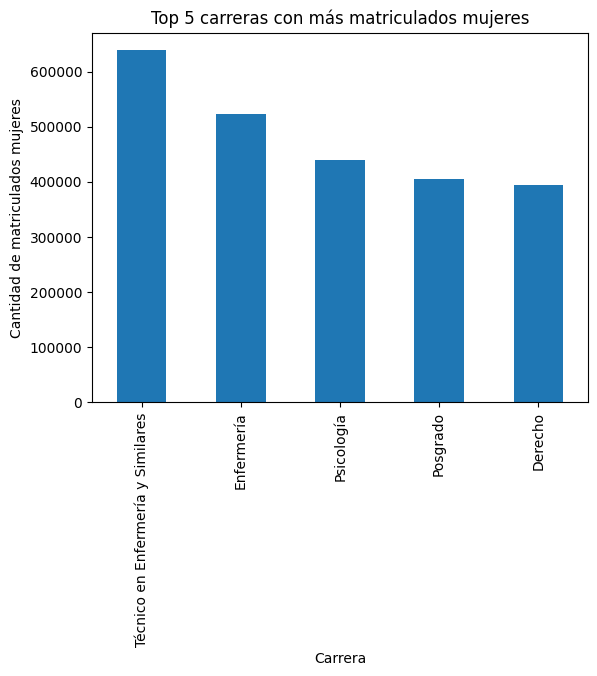

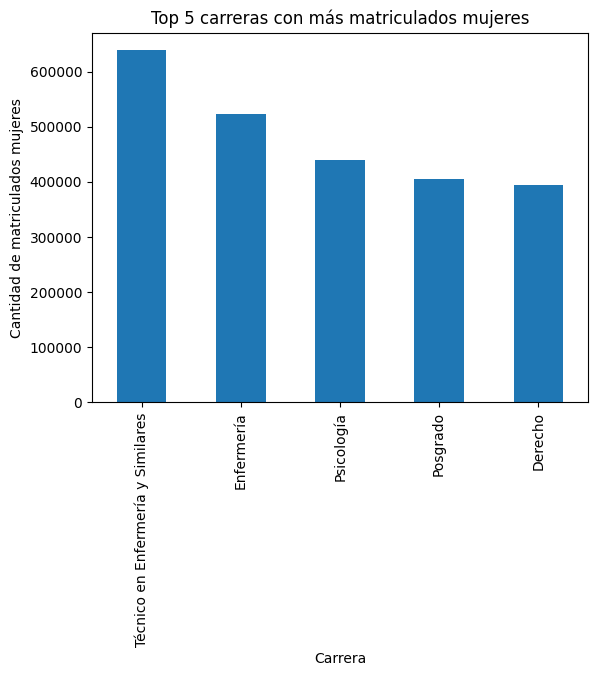

In [108]:
df.groupby('carrera_generica')['matricula_total_mujeres'].sum().nlargest(5).plot(kind='bar')
plt.title('Top 5 carreras con más matriculados mujeres')
plt.ylabel('Cantidad de matriculados mujeres')
plt.xlabel('Carrera')

plt.show()

# Gráfico matrículas por año
A continuación se encuentra la matrícula por año, tanto las totales como por hombre y mujeres. 

En el gráfico se visualiza que la cantidad de matrículas totales tiene una tendencia de aumento con cada año consecutivo, donde se observa que la tendencia es mantenida entre hombres y mujeres.

Un punto que llama la atención es que conforme avanzan los años se registran más matrículas de mujeres que de hombres.

Para este caso se decidió utilizar un gráfico de líneas para observar la tendencia de las matrículas.

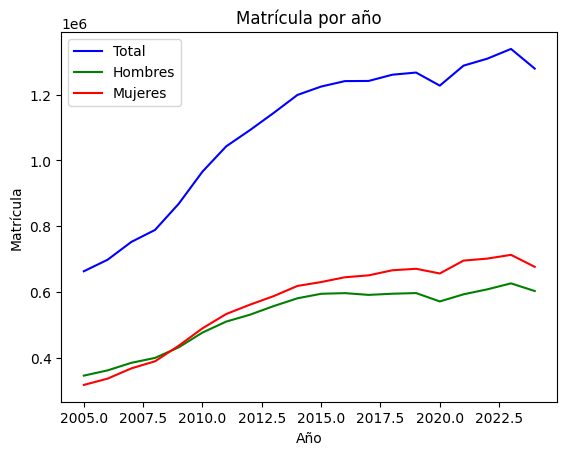

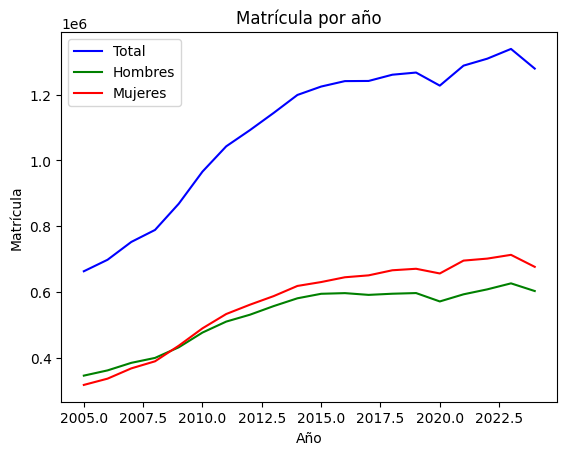

In [88]:
# Se agrupa por año y se suman los valores
df_grouped = df[['anio', 'matricula_total_nacional', 'matricula_total_hombres', 'matricula_total_mujeres']].groupby(['anio'], as_index=False).sum()
# Se grafican los valores según el año y el total de matrícula, matrícula de hombres y matrícula de mujeres
plt.plot(df_grouped['anio'], df_grouped['matricula_total_nacional'], color='blue', label='Total')
plt.plot(df_grouped['anio'], df_grouped['matricula_total_hombres'], color='green', label='Hombres')
plt.plot(df_grouped['anio'], df_grouped['matricula_total_mujeres'], color='red', label='Mujeres')
plt.xlabel('Año')
plt.ylabel('Matrícula')
plt.title('Matrícula por año')
plt.legend()

plt.show()


# Gráfico matrícula por tipo de carrera

En el gráfico se visualiza un mayor porcentaje de matrículas de mujeres en postítulo, mientras que en plan común o ciclo básico se observa un mayor porcentaje de matrículas de hombres.

Se utilizó un gráfico de barras porque se quería comparar los porcentajes de matrícula de hombres y mujeres en cada tipo de carrera.

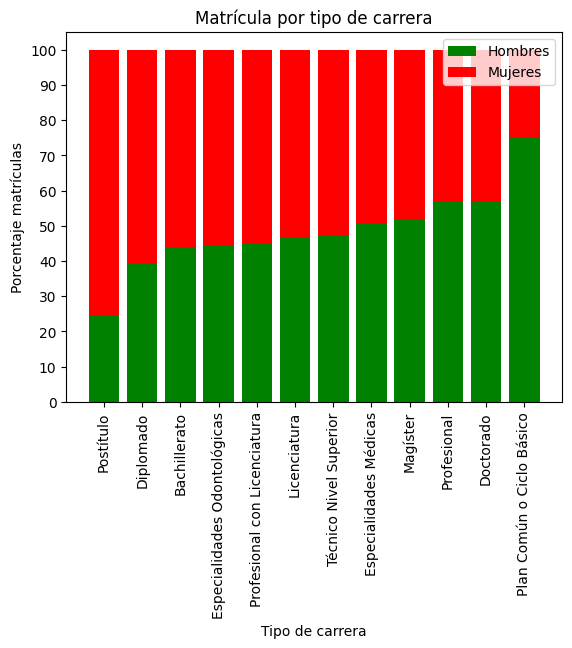

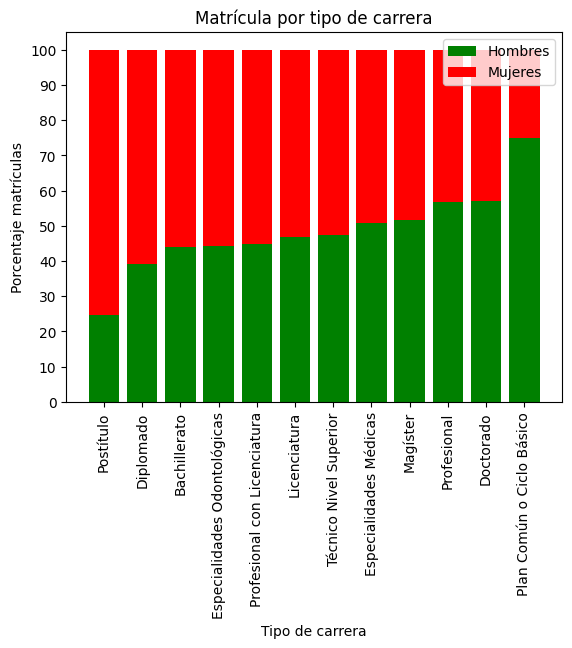

In [101]:
# Se agrupa por área de conocimiento y se suman los valores
df_grouped = df[['anio', 'matricula_total_nacional', 'matricula_total_hombres', 'matricula_total_mujeres', 'tipo_carrera']].groupby(['tipo_carrera'], as_index=False).sum()
df_grouped['percent_matricula_total_hombres'] = df_grouped['matricula_total_hombres'] / df_grouped['matricula_total_nacional'] * 100
df_grouped['percent_matricula_total_mujeres'] = df_grouped['matricula_total_mujeres'] / df_grouped['matricula_total_nacional'] * 100
df_grouped.sort_values(by='percent_matricula_total_hombres', inplace=True)
# Se grafican los valores según el área de conocimiento y los totales de matrícula de hombres y mujeres en un gráfico de barras, uno sobre el otro
plt.bar(df_grouped['tipo_carrera'], df_grouped['percent_matricula_total_hombres'], color='green', label='Hombres')
plt.bar(df_grouped['tipo_carrera'], df_grouped['percent_matricula_total_mujeres'], color='red', label='Mujeres', bottom=df_grouped['percent_matricula_total_hombres'])
plt.xlabel('Tipo de carrera')
plt.ylabel('Porcentaje matrículas')
plt.title('Matrícula por tipo de carrera')
plt.legend()

plt.xticks(rotation=90)
plt.yticks(range(0, 101, 10))
plt.show()

# Gráfico por área de conocimiento
A continuación se muestra un gráfico de barras que muestra la matrícula total de hombres y mujeres en cada área de conocimiento.

En el gráfico se visualiza que los tipos de programas con mayor matrícula son los de tecnología, administración y comercio, salud y educación.

Primeramente se puede comentar que existe una predominancia de matrículas de hombres en el área de tecnología y de mujeres en el área de salud. En el siguiente gráfico se podrá visualizar de mejor manera este punto.

Se utilizó un gráfico de barras porque es una buena manera de comparar dos conjuntos de datos en un mismo gráfico.

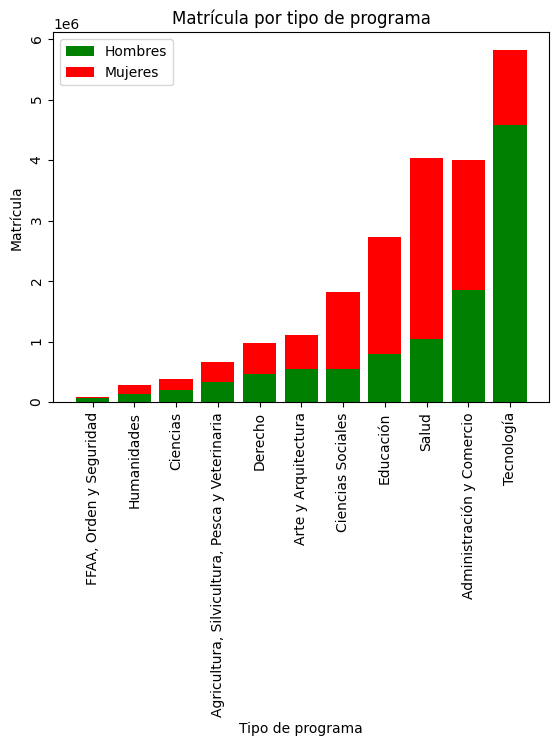

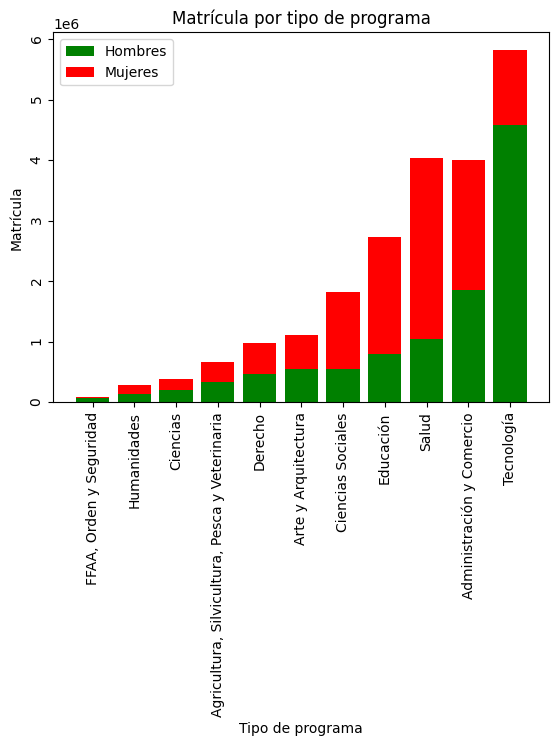

In [96]:
# Se agrupa por área de conocimiento y se suman los valores
df_grouped = df[['anio', 'matricula_total_nacional', 'matricula_total_hombres', 'matricula_total_mujeres', 'area_conocimiento']].groupby(['area_conocimiento'], as_index=False).sum()
df_grouped.sort_values(by='matricula_total_hombres', inplace=True)
# Se grafican los valores según el área de conocimiento y los totales de matrícula de hombres y mujeres en un gráfico de barras, uno sobre el otro
plt.bar(df_grouped['area_conocimiento'], df_grouped['matricula_total_hombres'], color='green', label='Hombres')
plt.bar(df_grouped['area_conocimiento'], df_grouped['matricula_total_mujeres'], color='red', label='Mujeres', bottom=df_grouped['matricula_total_hombres'])
plt.xlabel('Tipo de programa')
plt.ylabel('Matrícula')
plt.title('Matrícula por tipo de programa')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.show()

# Gráfico por área de conocimiento, porcentajes del total

A continuación se muestra un gráfico de barras que muestra el porcentaje de matrícula de hombres y mujeres en cada área de conocimiento en relación al total de matrícula nacional.

En el gráfico se puede observar que existe una predominancia de hombres en los tipos de programa de tecnología y FFAA, mientras que en los programas de salud, educación y ciencias sociales hay una predominancia de mujeres.

Se utilizó un gráfico de barras porque es una buena manera de comparar dos conjuntos de datos en un mismo gráfico.

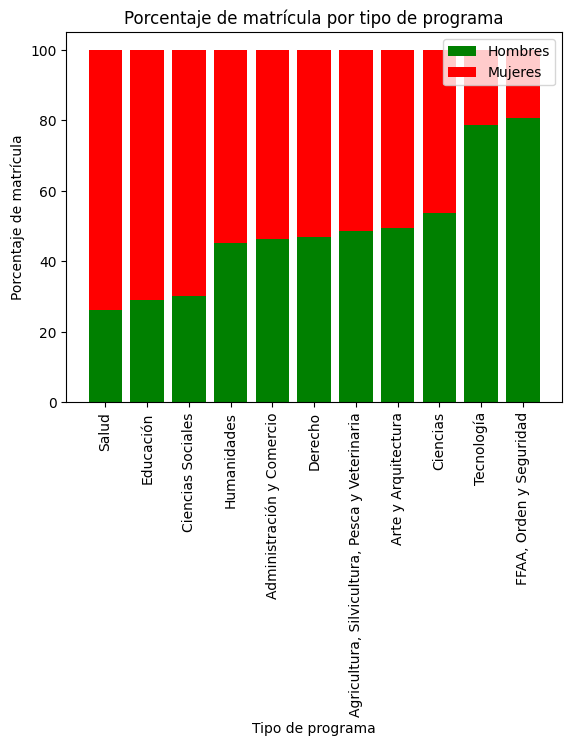

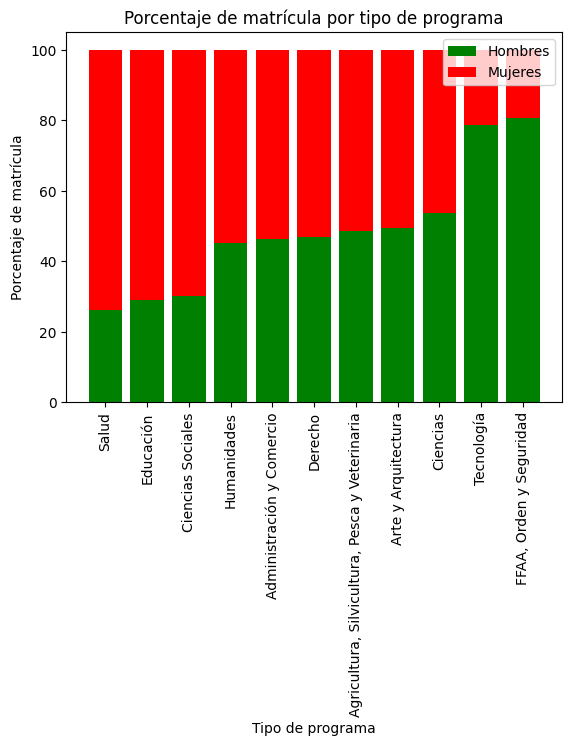

In [97]:
# Se agrupa por área de conocimiento y se suman los valores
df_grouped = df[['anio', 'matricula_total_nacional', 'matricula_total_hombres', 'matricula_total_mujeres', 'area_conocimiento']].groupby(['area_conocimiento'], as_index=False).sum()
# Se calcula el porcentaje de matrícula de hombres y mujeres en relación al total de matrícula nacional
df_grouped['percent_matricula_total_hombres'] = df_grouped['matricula_total_hombres'] / df_grouped['matricula_total_nacional'] * 100
df_grouped['percent_matricula_total_mujeres'] = df_grouped['matricula_total_mujeres'] / df_grouped['matricula_total_nacional'] * 100
df_grouped.sort_values(by='percent_matricula_total_hombres', inplace=True)
# Se grafican los valores según el área de conocimiento y los porcentajes de matrícula de hombres y mujeres en un gráfico de barras, uno sobre el otro
plt.bar(df_grouped['area_conocimiento'], df_grouped['percent_matricula_total_hombres'], color='green', label='Hombres')
plt.bar(df_grouped['area_conocimiento'], df_grouped['percent_matricula_total_mujeres'], color='red', label='Mujeres', bottom=df_grouped['percent_matricula_total_hombres'])
plt.xlabel('Tipo de programa')
plt.ylabel('Porcentaje de matrícula')
plt.title('Porcentaje de matrícula por tipo de programa')
plt.legend()
plt.xticks(rotation=90)

plt.show()

# Gráfico por área de conocimiento, porcentajes del total y por año

A continuación se muestra un gráfico de barras que muestra el porcentaje de matrícula de hombres y mujeres en cada área de conocimiento en relación al total de matrícula nacional, desglosado por año.

En los gráficos se puede observar que los porcentajes de matrícula de hombres y mujeres en cada área de conocimiento se mantienen relativamente constantes a lo largo de los años, con algunas variaciones menores. Para realizar comparaciones
más detalladas se podrían hacer tests de hipótesis para determinar si las diferencias son significativas.

Se utilizaron gráficos de barras porque es una buena manera de comparar dos conjuntos de datos en un mismo gráfico, y se utilizaron subgráficos para mostrar cada área de conocimiento por separado.

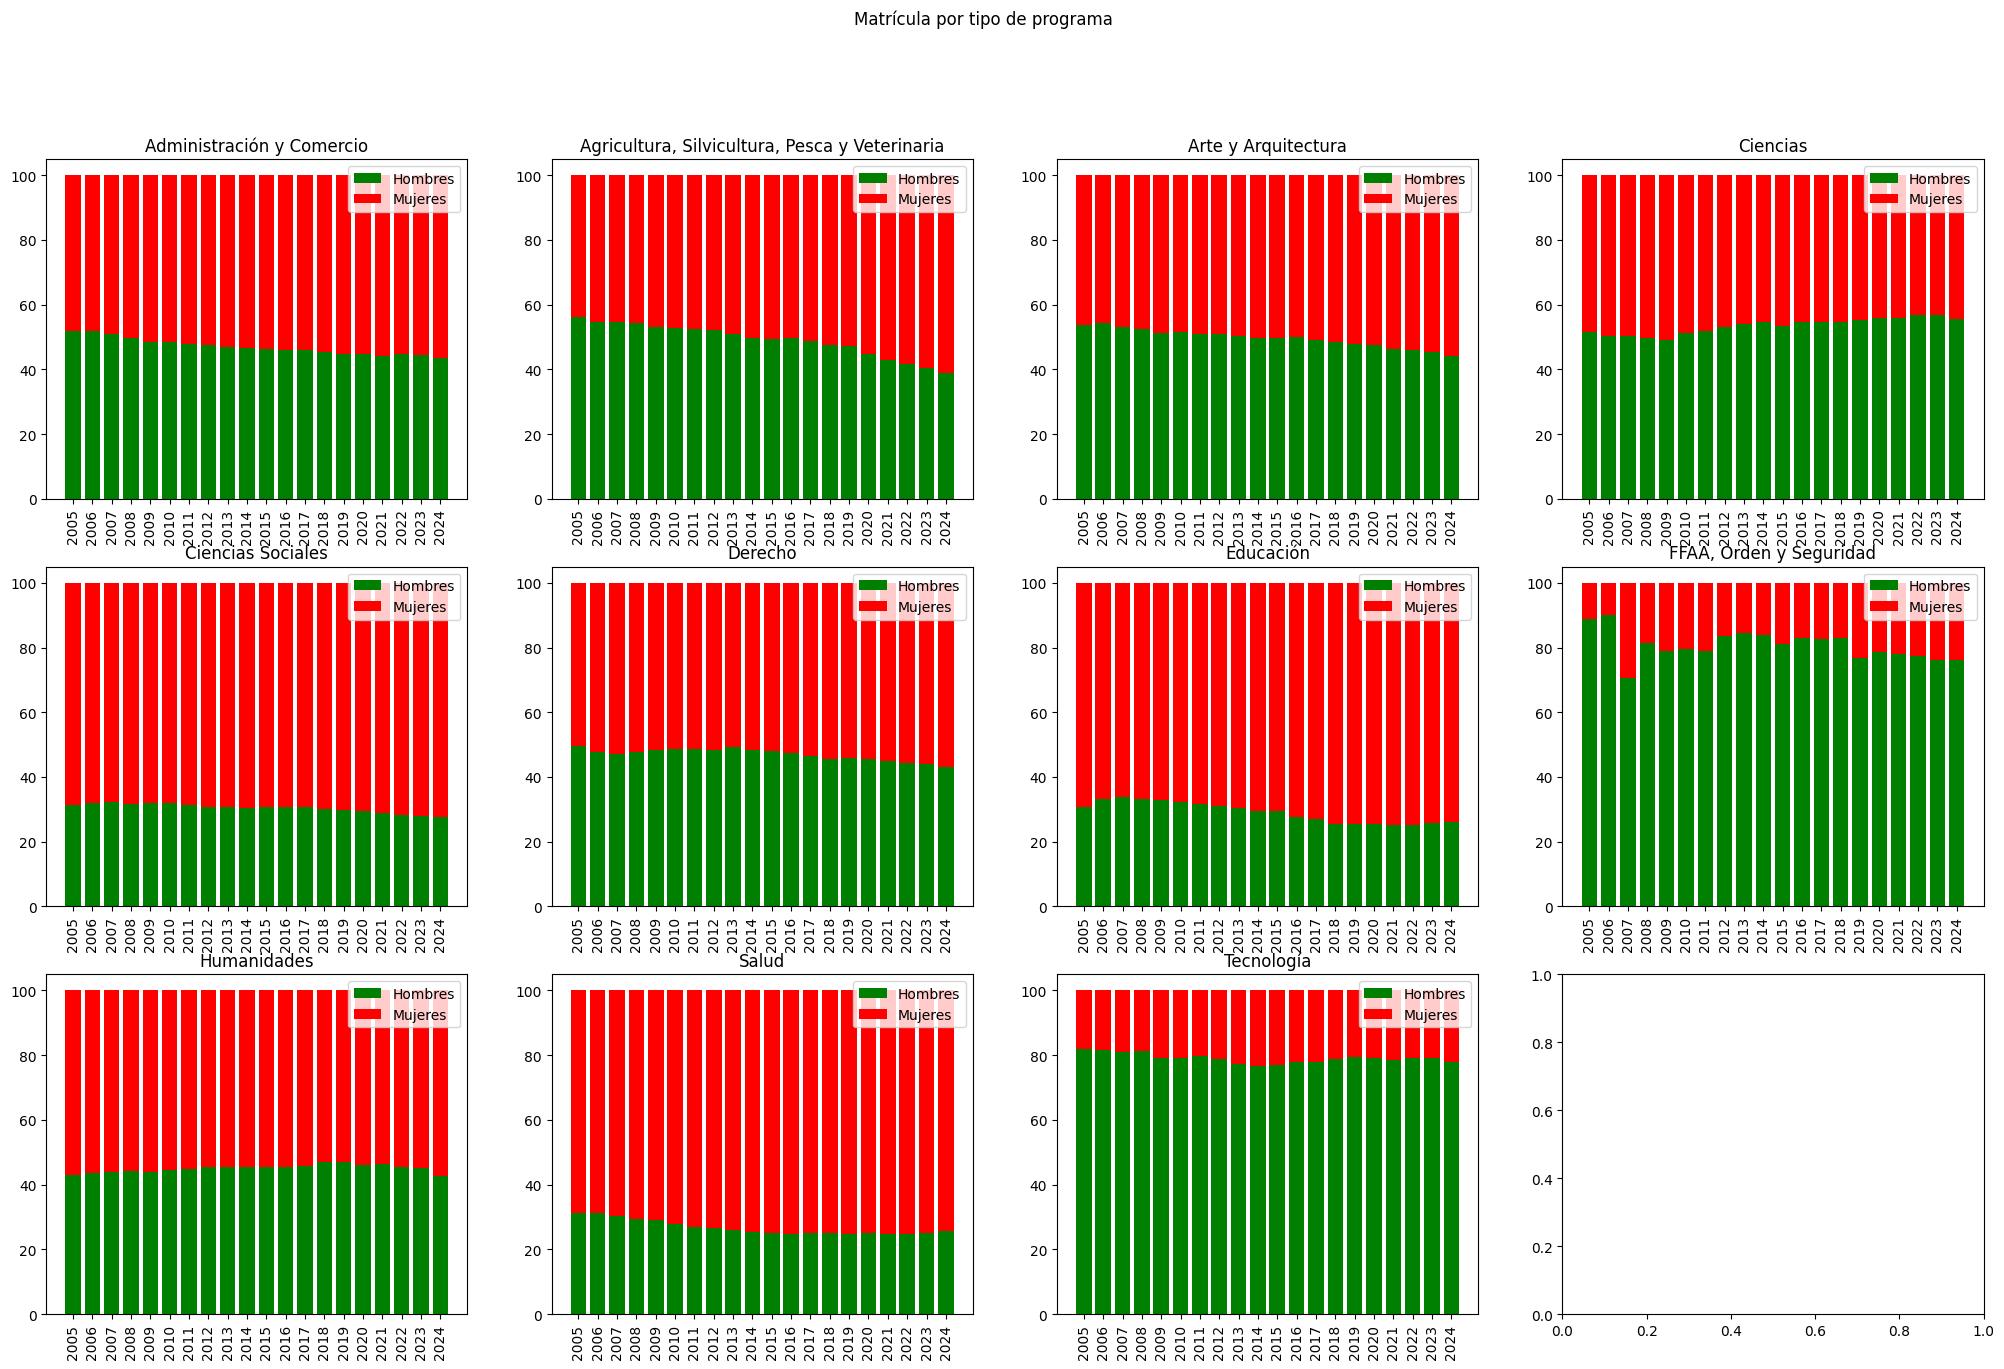

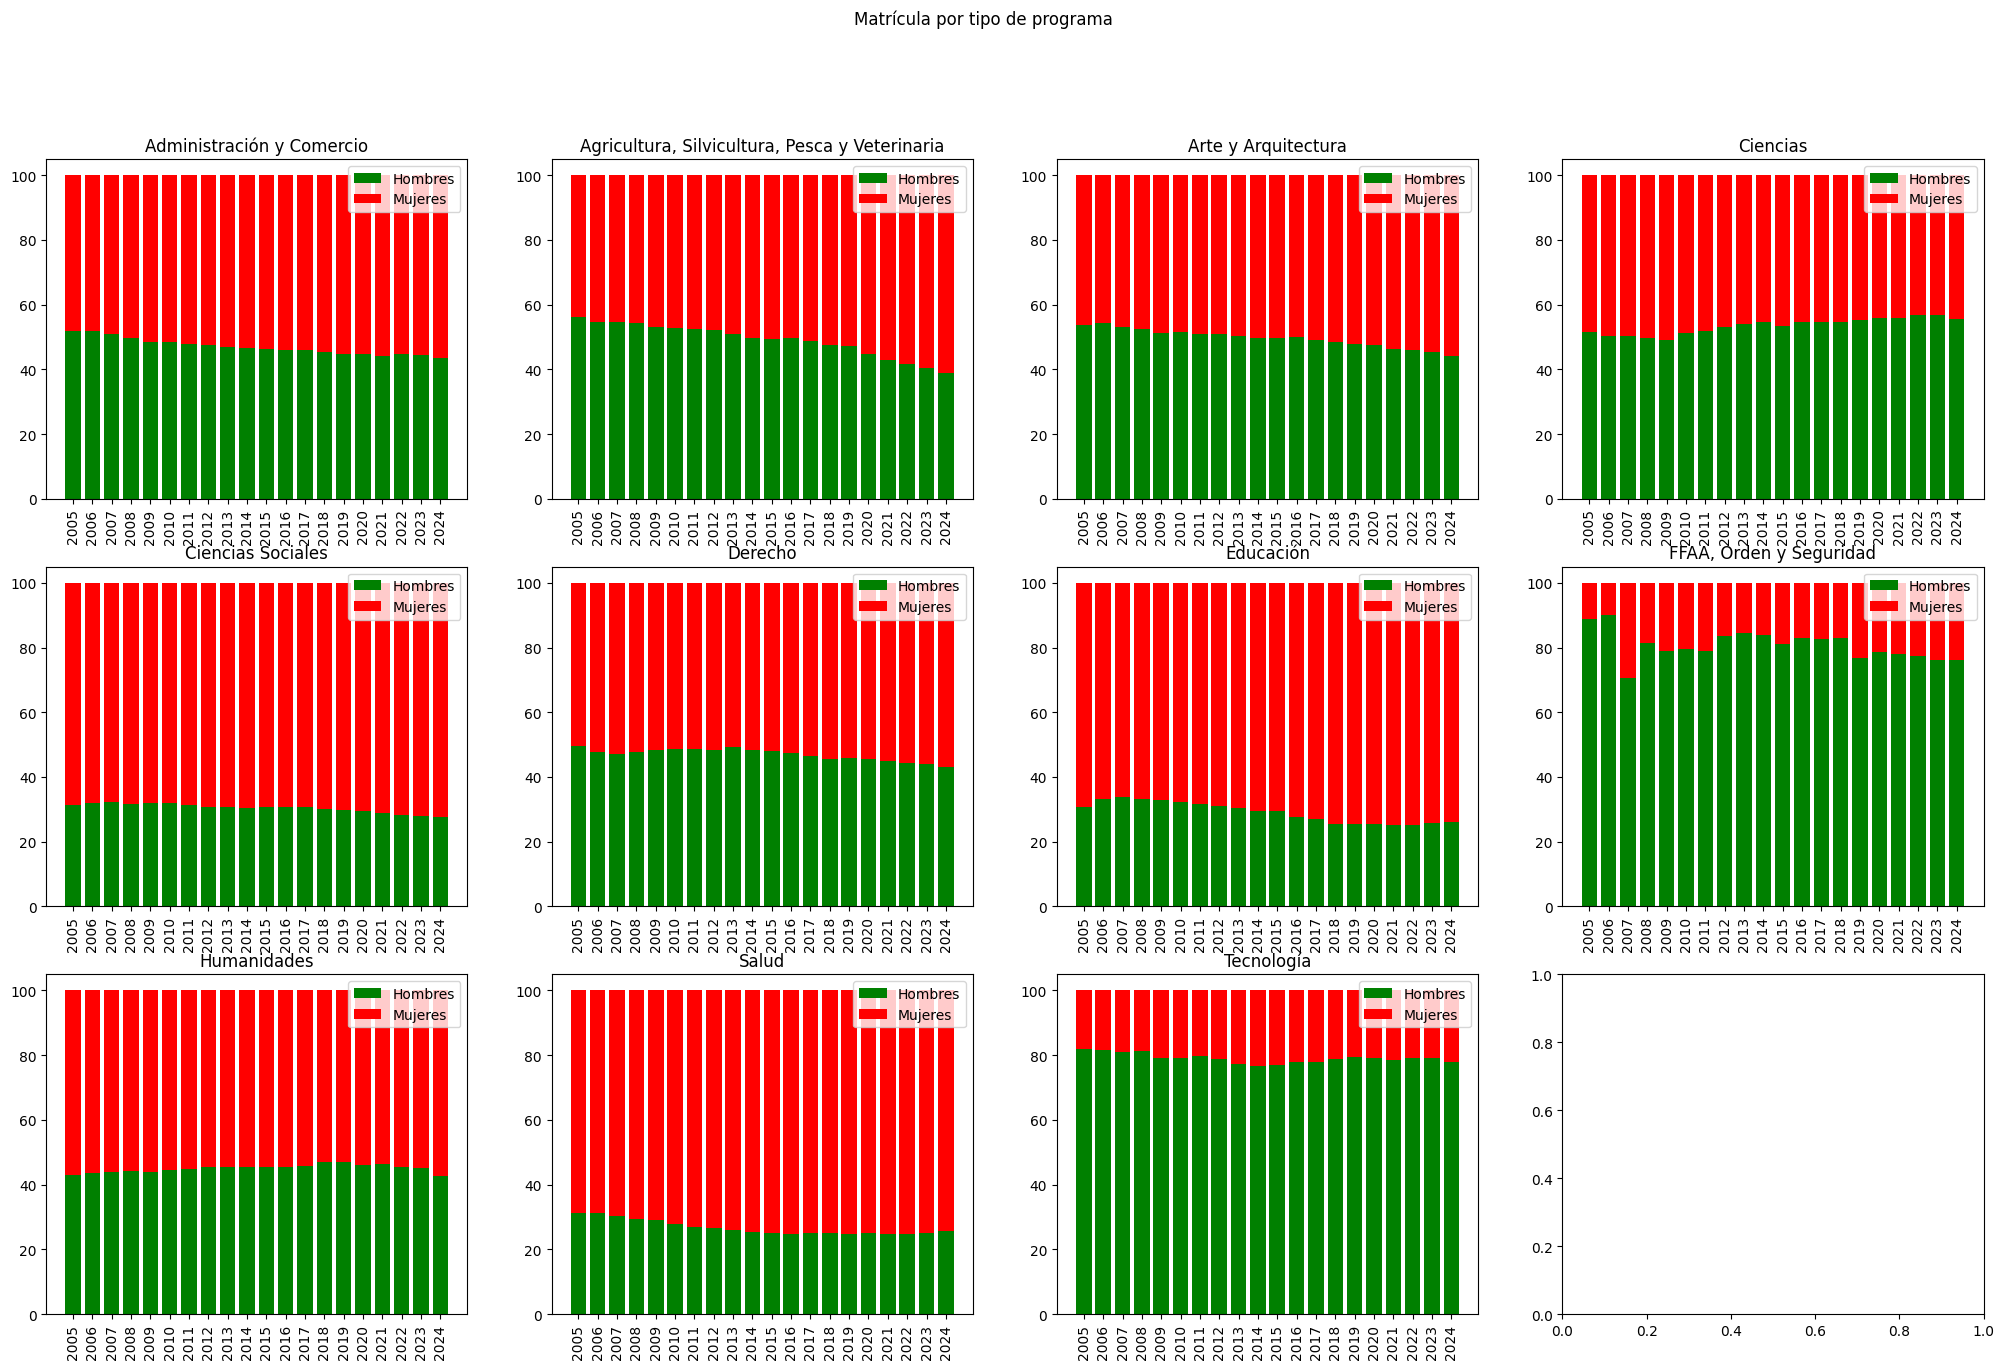

In [99]:
# Se agrupan los valores por área de conocimiento y año
df_grouped = df[['anio', 'matricula_total_nacional', 'matricula_total_hombres', 'matricula_total_mujeres', 'area_conocimiento']].groupby(['area_conocimiento', 'anio'], as_index=False).sum()
# Se calcula el porcentaje de matrícula de hombres y mujeres en relación al total de matrícula nacional
df_grouped['percent_matricula_total_hombres'] = df_grouped['matricula_total_hombres'] / df_grouped['matricula_total_nacional'] * 100
df_grouped['percent_matricula_total_mujeres'] = df_grouped['matricula_total_mujeres'] / df_grouped['matricula_total_nacional'] * 100
# Se crea una figura con 3x4 subgráficos para mostrar cada área de conocimiento
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(25, 15)
fig.suptitle('Matrícula por tipo de programa')
for i, area in enumerate(df_grouped['area_conocimiento'].unique()):
    # Se filtra el dataframe por el área de conocimiento
    df_area = df_grouped[df_grouped['area_conocimiento'] == area]
    axs[i//4, i%4].bar(df_area['anio'], df_area['percent_matricula_total_hombres'], color='green', label='Hombres')
    axs[i//4, i%4].bar(df_area['anio'], df_area['percent_matricula_total_mujeres'], color='red', label='Mujeres', bottom=df_area['percent_matricula_total_hombres'])
    axs[i//4, i%4].set_title(area)
    axs[i//4, i%4].legend()
    axs[i//4, i%4].set_xticks(df_grouped['anio'].unique())
    axs[i//4, i%4].set_xticklabels(df_grouped['anio'].unique(), rotation=90)